슬라이딩 윈도우, 이동편균, 차분

In [1]:
common_columns = ['DNBR', 'DTHY', 'DWB', 'HLW', 'HTR', 'HUP', 'LSGA', 'LSGB', 'LVCR',
'LVPZ', 'LWRB', 'NSGA', 'NSGB', 'P', 'PPM', 'PRB', 'PRBA', 'PSGA',
       'PSGB', 'PWNT', 'PWR', 'QMGA', 'QMGB', 'QMWT', 'RBLK', 'RC131', 'RC87',
       'RH', 'RHBR', 'RHFL', 'RHMT', 'RHRD', 'RM1', 'RM2', 'RM3', 'RM4',
       'SCMA', 'SCMB', 'SGLK', 'STRB', 'STSG', 'STTB', 'TAVG', 'TBLD', 'TCA',
       'TCB', 'TF', 'TFPK', 'TFSB', 'THA', 'THB', 'TIME', 'TPCT', 'TRB',
       'TSAT', 'VOID', 'VOL', 'WBK', 'WCFT', 'WCHG', 'WCSP', 'WECS', 'WFWA',
       'WFWB', 'WHPI', 'WLR', 'WRCA', 'WRCB', 'WRLA', 'WRLB', 'WSPY', 'WSTA',
       'WSTB', 'WTRA', 'WTRB', 'WUP', 'label']

In [2]:
common_columns2 = ['DNBR', 'DTHY', 'DWB', 'HLW', 'HTR', 'HUP', 'LSGA', 'LSGB', 'LVCR',
'LVPZ', 'LWRB', 'NSGA', 'NSGB', 'P', 'PPM', 'PRB', 'PRBA', 'PSGA',
       'PSGB', 'PWNT', 'PWR', 'QMGA', 'QMGB', 'QMWT', 'RBLK', 'RC131', 'RC87',
       'RH', 'RHBR', 'RHFL', 'RHMT', 'RHRD', 'RM1', 'RM2', 'RM3', 'RM4',
       'SCMA', 'SCMB', 'SGLK', 'STRB', 'STSG', 'STTB', 'TAVG', 'TBLD', 'TCA',
       'TCB', 'TF', 'TFPK', 'TFSB', 'THA', 'THB', 'TIME', 'TPCT', 'TRB',
       'TSAT', 'VOID', 'VOL', 'WBK', 'WCFT', 'WCHG', 'WCSP', 'WECS', 'WFWA',
       'WFWB', 'WHPI', 'WLR', 'WRCA', 'WRCB', 'WRLA', 'WRLB', 'WSPY', 'WSTA',
       'WSTB', 'WTRA', 'WTRB', 'WUP']

In [3]:
# train
import pandas as pd
import numpy as np
import os
import csv
from tqdm import tqdm
pathList = []
##1. 패스 생성
homePath = 'train/' #들여다볼 폴더들이 있는 상위 폴더
folders = os.listdir(homePath) #불러올 각 폴더들을 리스트에 저장합니다.

for folder in (folders): #불러올 폴더가 여러개이니 반복문을 이용합니다.
    folderName = folder #folderName에 각 폴더명을 저장합니다.

    files = os.listdir(homePath + folder) #불러올 각 파일들을 리스트에 저장합니다.

    for file in files: #불러올 파일 또한 여러개이니 반복문을 이용합니다.
        fileName = file #fileName에 각 파일명을 저장합니다.

        path = homePath + folderName + '/' + fileName #알아낸 폴더와 파일을 이름을 조합합니다.

        pathList.append(path) #path들을 한 리스트에 저장
        
# csv 불러오기
dfs=[]
def load_csv(pathList):
    for a,file in tqdm(enumerate(pathList)):
        df = pd.read_csv(file)
        df['label'] = pathList[a].split('/')[1]
        dfs.append(df)
    return dfs
load_csv(pathList)

train = pd.concat([df[common_columns]for df in dfs], axis=0, ignore_index=True)
# 변수 WPCS, WPMU, WPFW 칼럼 제거
train = train.dropna(axis=1)

806it [00:07, 106.80it/s]


In [4]:
pathList = []
##1. 패스 생성
homePath = 'test/' #들여다볼 폴더들이 있는 상위 폴더
folders = os.listdir(homePath) #불러올 각 폴더들을 리스트에 저장합니다.

for folder in (folders): #불러올 폴더가 여러개이니 반복문을 이용합니다.
    folderName = folder #folderName에 각 폴더명을 저장합니다.

    files = os.listdir(homePath + folder) #불러올 각 파일들을 리스트에 저장합니다.

    for file in files: #불러올 파일 또한 여러개이니 반복문을 이용합니다.
        fileName = file #fileName에 각 파일명을 저장합니다.

        path = homePath + folderName + '/' + fileName #알아낸 폴더와 파일을 이름을 조합합니다.

        pathList.append(path) #path들을 한 리스트에 저장
        
# csv 불러오기
dfs=[]
load_csv(pathList)

test = pd.concat([df[common_columns]for df in dfs], axis=0, ignore_index=True)
# 변수 WPCS, WPMU, WPFW 칼럼 제거
test = test.dropna(axis=1)

206it [00:01, 104.99it/s]


In [5]:
train

,DNBR,DTHY,DWB,HLW,HTR,HUP,LSGA,LSGB,LVCR,LVPZ,...,WRCB,WRLA,WRLB,WSPY,WSTA,WSTB,WTRA,WTRB,WUP,label
0,1.630000,0.009256,0.000692,1310.893433,200.000006,2583.701416,10.957693,10.957693,7.924896,52.600002,...,27556.000000,0.0,0.0,0.0,2873.244873,2873.244873,0.0,0.0,0.0,ATWS
1,1.629482,0.009256,0.000692,1310.863403,197.180080,2583.630371,10.957623,10.957623,7.924896,52.618706,...,27556.000000,0.0,0.0,0.0,2873.244873,2873.244873,0.0,0.0,0.0,ATWS
2,1.628558,0.009256,0.000692,1310.835815,193.024412,2583.524902,10.957539,10.957539,7.924896,52.657574,...,27556.000000,0.0,0.0,0.0,2873.244873,2873.244873,0.0,0.0,0.0,ATWS
3,1.628483,0.009256,0.000692,1310.819458,188.415659,2583.408447,10.957538,10.957538,7.924896,52.703625,...,27556.000000,0.0,0.0,0.0,2873.244873,2873.244873,0.0,0.0,0.0,ATWS
4,1.628626,0.009256,0.000692,1310.806519,184.107669,2583.299316,10.957580,10.957580,7.924896,52.745777,...,27556.000000,0.0,0.0,0.0,2873.244873,2873.244873,0.0,0.0,0.0,ATWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635339,378.020844,0.009256,0.000692,1339.002319,1.134838,2578.641602,12.845274,12.844204,7.924896,34.291431,...,28580.123047,0.0,0.0,0.0,60.970295,-7.150814,0.0,0.0,0.0,TT
635340,378.123444,0.009256,0.000692,1339.007568,1.087970,2578.640137,12.845285,12.844343,7.924896,34.292027,...,28580.123047,0.0,0.0,0.0,49.707851,4.603696,0.0,0.0,0.0,TT
635341,378.075867,0.009256,0.000692,1339.004517,1.035242,2578.639160,12.844765,12.844299,7.924896,34.292671,...,28580.123047,0.0,0.0,0.0,31.521065,22.198261,0.0,0.0,0.0,TT
635342,378.061127,0.009256,0.000692,1339.003906,1.160225,2578.642090,12.845042,12.844675,7.924896,34.291000,...,28580.123047,0.0,0.0,0.0,28.270805,26.211420,0.0,0.0,0.0,TT


In [6]:
# 단일 : Normal, SP, LACP, LOF, ATWS, TT  
idx = train[(train['label']  == 'LOF') | (train['label']  == 'NORM') | (train['label'] == 'SP') | (train['label'] == 'LACP') | (train['label'] == 'ATWS') | (train['label'] == 'TT')].index
train.drop(idx, axis = 0, inplace=True)
idx = test[(test['label']  == 'LOF') | (test['label']  == 'NORM') | (test['label'] == 'SP') | (test['label'] == 'LACP') | (test['label'] == 'ATWS') | (test['label'] == 'TT')].index
test.drop(idx, axis = 0, inplace=True)

In [7]:
# 데이터 축소
train = train[train['TIME'] <= 3500]
test = test[test['TIME'] <= 3500]

In [8]:
# 30초 간격으로 데이터 축소해보기
trian = train[train['TIME'] % 30 == 0]
train.reset_index(drop=True, inplace = True)
test = test[test['TIME'] % 30 == 0]
test.reset_index(drop=True, inplace = True)

In [9]:
# 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['label'] = le.fit_transform(train['label'])
test['label'] = le.fit_transform(test['label'])

C:\Users\ETAC-03-05\anaconda3\envs\epr\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
le.classes_

array(['FLB', 'LLB', 'LOCA', 'LOCAC', 'LR', 'MD', 'SGATR', 'SGBTR',
       'SLBIC', 'SLBOC'], dtype=object)

---

---

In [12]:
# xgboost  실행
from xgboost import XGBClassifier
Y_train = train['label']
Y_test = test['label']
train = train.drop(['label', 'TIME'], axis = 1)
test = test.drop(['label', 'TIME'], axis = 1)

In [13]:
def create_features_from_df(df, window_size):
    """
    DataFrame을 이용한 슬라이딩 윈도우 기법으로 피처 생성.
    window_size: 윈도우 크기 (과거 n개의 시점)
    """
    features = []
    first_value = df.iloc[0]
    df = pd.concat([pd.DataFrame([first_value] * (window_size), columns=df.columns), df], axis=0)
    
    for i in range(window_size, len(df)):
        window = df.iloc[i:i + window_size]  # 슬라이딩 윈도우 범위
        # 각 윈도우 내의 특성 계산 (평균, 표준편차, 최소값, 최대값, 중앙값)
        mean = window.mean().values
        std = window.std().values
        #min_val = window.min().values
        #max_val = window.max().values
        median = window.median().values
        
        # 모든 특성 결합
        feature = np.concatenate([mean, std, median])
        features.append(feature)
    
    # 생성된 피처를 DataFrame으로 변환
    feature_columns = []
    for col in df.columns:
        feature_columns.extend([f"{col}_mean", f"{col}_std", f"{col}_median"])
    
    return pd.DataFrame(features, columns=feature_columns)

# 윈도우 크기 설정
window_size = 5

# 슬라이딩 윈도우로 특성 생성
train = create_features_from_df(train, window_size)
test = create_features_from_df(test, window_size)

In [15]:
%%time
# 훈련
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y_train, test_size=0.2)
xgb = XGBClassifier(tree_method = 'gpu_hist',  
                    predictor = 'gpu_predictor',
                    n_estimators = 500, 
                    objective = 'multi:softproba',
                    learning_rate = 0.1,
                    seed=1214
                   )
xgb_model = xgb.fit(X_train, y_train, eval_metric = 'mlogloss', eval_set = [(X_test, y_test)], early_stopping_rounds=25)

C:\Users\ETAC-03-05\anaconda3\envs\epr\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
C:\Users\ETAC-03-05\anaconda3\envs\epr\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-mlogloss:1.83342
[1]	validation_0-mlogloss:1.54510
[2]	validation_0-mlogloss:1.33430
[3]	validation_0-mlogloss:1.16654
[4]	validation_0-mlogloss:1.02914
[5]	validation_0-mlogloss:0.91430
[6]	validation_0-mlogloss:0.81623
[7]	validation_0-mlogloss:0.73102
[8]	validation_0-mlogloss:0.65680
[9]	validation_0-mlogloss:0.59155
[10]	validation_0-mlogloss:0.53398
[11]	validation_0-mlogloss:0.48298
[12]	validation_0-mlogloss:0.43754
[13]	validation_0-mlogloss:0.39699
[14]	validation_0-mlogloss:0.36064
[15]	validation_0-mlogloss:0.32787
[16]	validation_0-mlogloss:0.29863
[17]	validation_0-mlogloss:0.27229
[18]	validation_0-mlogloss:0.24820
[19]	validation_0-mlogloss:0.22663
[20]	validation_0-mlogloss:0.20702
[21]	validation_0-mlogloss:0.18967
[22]	validation_0-mlogloss:0.17383
[23]	validation_0-mlogloss:0.15958
[24]	validation_0-mlogloss:0.14649
[25]	validation_0-mlogloss:0.13454
[26]	validation_0-mlogloss:0.12385
[27]	validation_0-mlogloss:0.11420
[28]	validation_0-mlogloss:0.1

[231]	validation_0-mlogloss:0.00218
[232]	validation_0-mlogloss:0.00215
[233]	validation_0-mlogloss:0.00212
[234]	validation_0-mlogloss:0.00211
[235]	validation_0-mlogloss:0.00209
[236]	validation_0-mlogloss:0.00207
[237]	validation_0-mlogloss:0.00204
[238]	validation_0-mlogloss:0.00203
[239]	validation_0-mlogloss:0.00202
[240]	validation_0-mlogloss:0.00202
[241]	validation_0-mlogloss:0.00201
[242]	validation_0-mlogloss:0.00201
[243]	validation_0-mlogloss:0.00199
[244]	validation_0-mlogloss:0.00199
[245]	validation_0-mlogloss:0.00198
[246]	validation_0-mlogloss:0.00197
[247]	validation_0-mlogloss:0.00194
[248]	validation_0-mlogloss:0.00193
[249]	validation_0-mlogloss:0.00191
[250]	validation_0-mlogloss:0.00189
[251]	validation_0-mlogloss:0.00187
[252]	validation_0-mlogloss:0.00186
[253]	validation_0-mlogloss:0.00186
[254]	validation_0-mlogloss:0.00185
[255]	validation_0-mlogloss:0.00184
[256]	validation_0-mlogloss:0.00183
[257]	validation_0-mlogloss:0.00182
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.00090
[460]	validation_0-mlogloss:0.00089
[461]	validation_0-mlogloss:0.00089
[462]	validation_0-mlogloss:0.00089
[463]	validation_0-mlogloss:0.00089
[464]	validation_0-mlogloss:0.00089
[465]	validation_0-mlogloss:0.00088
[466]	validation_0-mlogloss:0.00088
[467]	validation_0-mlogloss:0.00088
[468]	validation_0-mlogloss:0.00088
[469]	validation_0-mlogloss:0.00088
[470]	validation_0-mlogloss:0.00088
[471]	validation_0-mlogloss:0.00088
[472]	validation_0-mlogloss:0.00087
[473]	validation_0-mlogloss:0.00087
[474]	validation_0-mlogloss:0.00087
[475]	validation_0-mlogloss:0.00087
[476]	validation_0-mlogloss:0.00087
[477]	validation_0-mlogloss:0.00087
[478]	validation_0-mlogloss:0.00087
[479]	validation_0-mlogloss:0.00087
[480]	validation_0-mlogloss:0.00087
[481]	validation_0-mlogloss:0.00087
[482]	validation_0-mlogloss:0.00086
[483]	validation_0-mlogloss:0.00086
[484]	validation_0-mlogloss:0.00086
[485]	validation_0-mlogloss:0.00086
[486]	validation_0-mlogloss:

In [16]:
pred = xgb_model.predict(test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

accuracy = accuracy_score(Y_test, pred) # 정확도 계산
precision = precision_score(Y_test, pred, average='weighted') # 정밀도 계산
recall = recall_score(Y_test, pred, average='weighted') # 재현율 계산
f1 = f1_score(Y_test, pred, average='weighted') # F1-Score 계산
# 결과 출력
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9791452991452991
Precision: 0.980472363524352
Recall: 0.9791452991452991
F1-Score: 0.9790603086214251


Permutation Importance: permutation_importance를 사용해 성능 감소로 중요도를 평가합니다.  

SHAP: shap 패키지를 사용하여 각 특성의 기여도를 평가합니다.  

Tree SHAP: 트리 모델에 최적화된 SHAP 값을 계산하여 기여도를 평가합니다.  

LIME: 특정 예측을 설명할 때 로컬 해석을 제공합니다.  

PDP: 특정 특성이 예측값에 미치는 영향을 시각화합니다.  

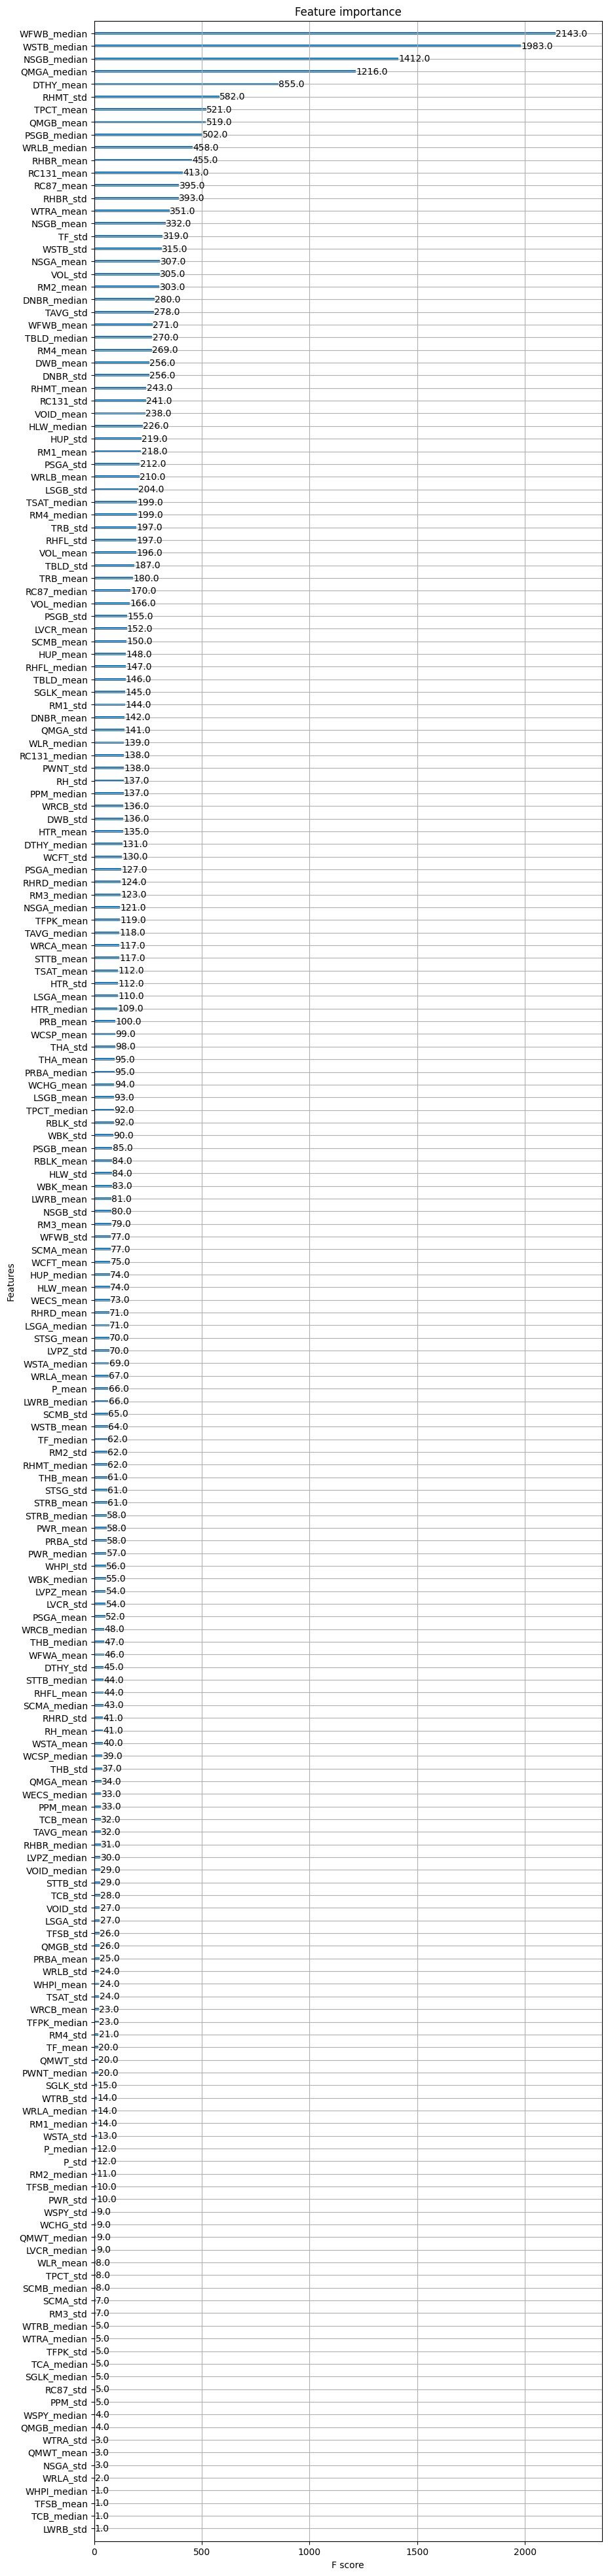

In [18]:
# Plot Importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,50))
plot_importance(xgb_model, ax=ax)
plt.show()

In [19]:
from sklearn.inspection import permutation_importance
# Permutation Importance
result = permutation_importance(xgb_model, test, Y_test, n_repeats=5, random_state=1214)
# 중요도 출력
importance = result.importances_mean
for i, v in enumerate(importance):
    print(f'Feature {i}: {v}')

Feature 0: 0.00011111111111110628
Feature 1: -0.0011111111111111072
Feature 2: -0.0008803418803418727
Feature 3: 0.0011282051282051286
Feature 4: 0.0
Feature 5: -5.128205128210883e-05
Feature 6: -6.83760683761081e-05
Feature 7: 7.692307692306333e-05
Feature 8: 0.0
Feature 9: 5.128205128204222e-05
Feature 10: 8.547008546999635e-06
Feature 11: -7.692307692308553e-05
Feature 12: -2.5641025641065518e-05
Feature 13: -0.0015384615384615552
Feature 14: 0.001230769230769213
Feature 15: -0.0010341880341880438
Feature 16: 0.0009743589743589798
Feature 17: 4.273504273502038e-05
Feature 18: -0.00011111111111112848
Feature 19: 2.5641025640998904e-05
Feature 20: -0.00011965811965815032
Feature 21: -5.1282051282086624e-05
Feature 22: -0.0011623931623931717
Feature 23: 0.0
Feature 24: -0.00017948717948719218
Feature 25: -9.401709401712921e-05
Feature 26: 4.2735042734998174e-05
Feature 27: -0.0012564102564103009
Feature 28: -6.83760683761081e-05
Feature 29: 1.709401709399927e-05
Feature 30: -0.00010256

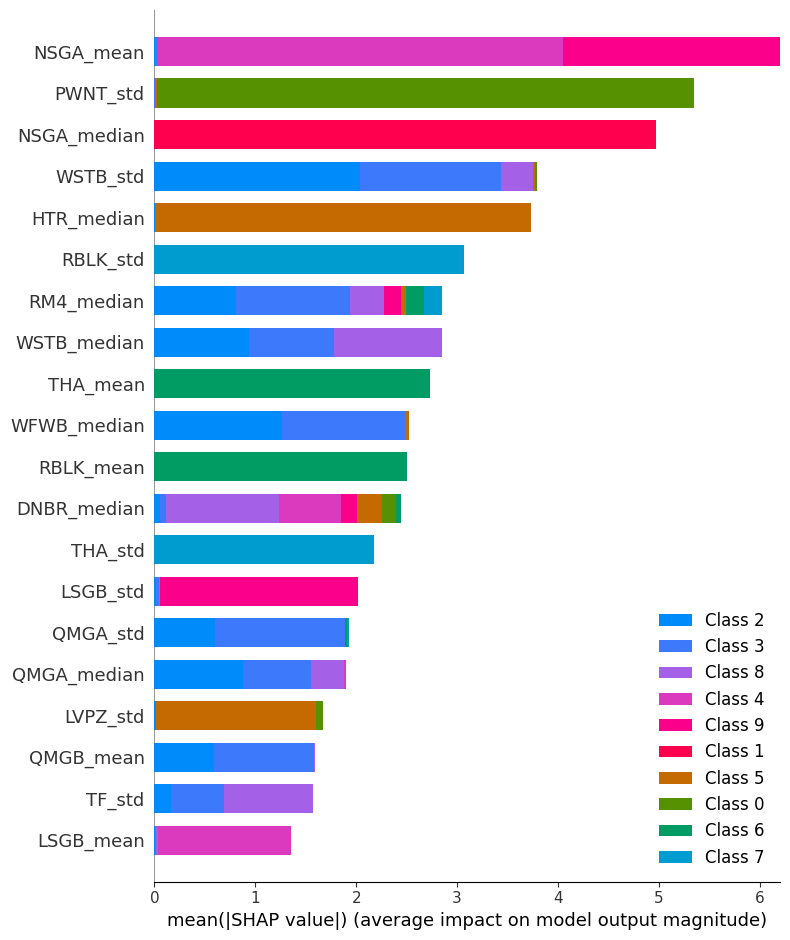

In [20]:
# Tree Shap
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(test.values)
shap.summary_plot(shap_values, test)

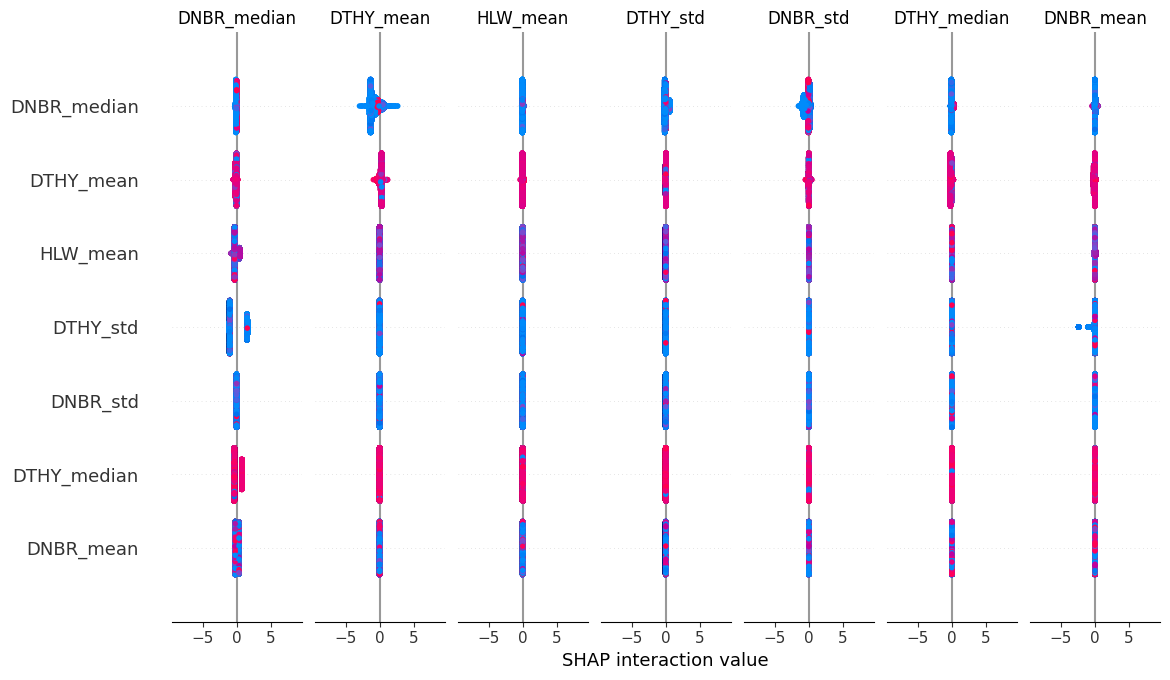

In [21]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(test.values)
shap.summary_plot(shap_values, test)

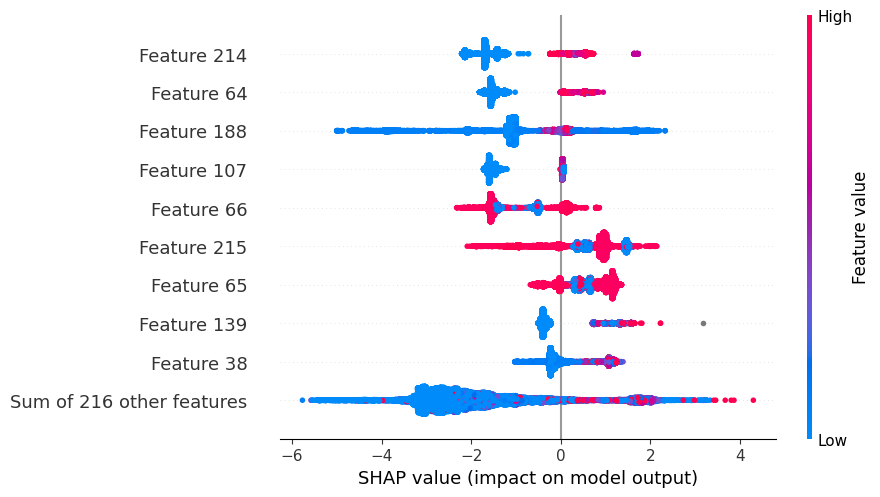

In [22]:
# 4번째 label에 대한 피처 중요도
shap.plots.beeswarm(shap_values[:,:,3])

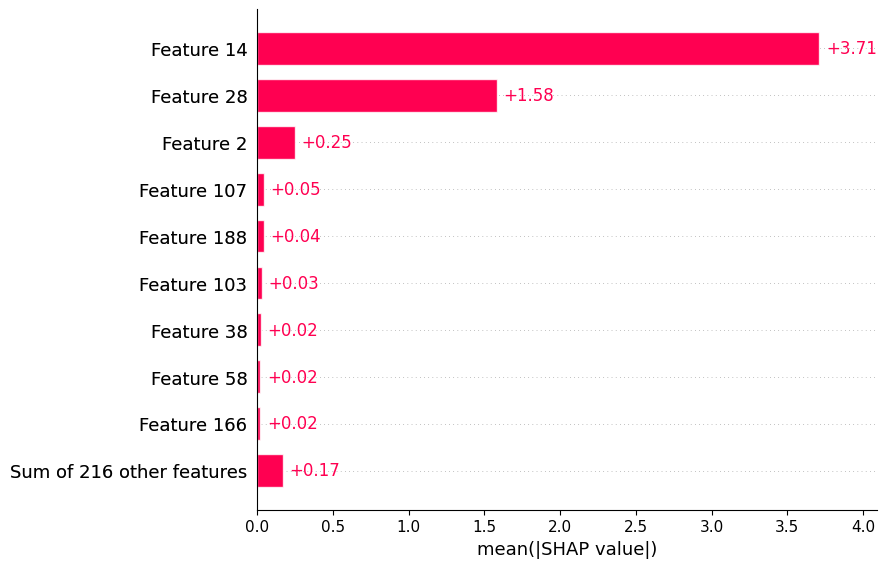

In [27]:
# 5번째 샘플에 대해 4번째 레이블의 shap 값
shap.plots.bar(shap_values[:,:,5])

---

import pandas as pd
import numpy as np
path = "Operation_OPR1000/"

test1 = pd.read_csv(path + "LOCA/LOCA_OPR1000_250_1.csv")
test1 = test1[common_columns2]
test2 = pd.read_csv(path + "LOCAC/LOCAC_OPR1000_250_1.csv")
test2 = test2[common_columns2]

test1 = test1[test1['TIME'] <= 4000]
test2 = test2[test2['TIME'] <= 4000]

test1 = test1[test1['TIME'] % 60 == 0]
test2 = test2[test2['TIME'] % 60 == 0]

test1 = test1.drop('TIME', axis = 1)
test2 = test2.drop('TIME', axis = 1)

X1 = create_features_from_df(test1, window_size)
X2 = create_features_from_df(test2, window_size)

pred1 = xgb_model.predict(X1)
pred2 = xgb_model.predict(X2)

pred1 = pred1.tolist()
print(pred1)

pred2 = pred2.tolist()
print(pred2)

---

---

path = "Operation_csv_data/"
ATWS = pd.read_csv(path+"ATWS/1.csv", encoding = 'utf-8-sig')
FLB = pd.read_csv(path+"FLB/1.csv", encoding = 'utf-8-sig')
LACP = pd.read_csv(path+"LACP/1.csv", encoding = 'utf-8-sig')
LLB = pd.read_csv(path+"LLB/1.csv", encoding = 'utf-8-sig')
LOCA = pd.read_csv(path+"LOCA/1.csv", encoding = 'utf-8-sig')
LOCAC = pd.read_csv(path+"LOCAC/1.csv", encoding = 'utf-8-sig')
LOF = pd.read_csv(path+"LOF/1.csv", encoding = 'utf-8-sig')
LR = pd.read_csv(path+"LR/1.csv", encoding = 'utf-8-sig')
MD = pd.read_csv(path+"MD/1.csv", encoding = 'utf-8-sig')
Normal = pd.read_csv(path+"Normal/1.csv", encoding = 'utf-8-sig')
RI = pd.read_csv(path+"RI/-1.csv", encoding = 'utf-8-sig')
RW = pd.read_csv(path+"RW/1.csv", encoding = 'utf-8-sig')
SGATR = pd.read_csv(path+"SGATR/1.csv", encoding = 'utf-8-sig')
SGBTR = pd.read_csv(path+"SGBTR/1.csv", encoding = 'utf-8-sig')
SLBIC = pd.read_csv(path+"SLBIC/1.csv", encoding = 'utf-8-sig')
SLBOC = pd.read_csv(path+"SLBOC/1.csv", encoding = 'utf-8-sig')
SP = pd.read_csv(path+"SP/1.csv", encoding = 'utf-8-sig')
TT = pd.read_csv(path+"TT/1.csv", encoding = 'utf-8-sig')